# Tech - profiling

Le [profilage de code](https://fr.wikipedia.org/wiki/Profilage_de_code) ou *profiling* en anglais signifie qu'on mesure le temps passé dans chaque partie d'un programme pour en découvrir les parties les plus coûteuses et les améliorer. On souhaite toujours accélérer un programme trop lent, le profiling permet de savoir sur quelles parties se concentrer.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

Autre lecture : [Exemple de profiling](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/notebooks/profiling_example.html#profilingexamplerst).

## Enoncé

On applique le profiling au code suivant pour découvrir laquelle de ces fonctions est la plus lente. Vous pouvez changer ce code pour un de ceux que vous avez écrits précédemment.

In [2]:
def _gini_sort(Y):
    return list(sorted(Y))


def _gini_init(Y):
    return [[1, y] for y in Y]


def _gini_cumsum(couples):
    for i in range(1, len(couples)):
        couples[i][0] += couples[i-1][0]
        couples[i][1] += couples[i-1][1]
    for i in range(0, len(couples)):
        couples[i][0] /= couples[-1][0]
        couples[i][1] /= couples[-1][1]
    return couples

    
def _gini_final(couples):
    g = couples[0][0] * couples[0][1]
    n = len(couples)

    for i in range(1, n):
        dx = couples[i][0] - couples[i-1][0]
        y = couples[i-1][1] + couples[i][1]
        g += dx * y

    return 1. - g / 2


def gini(Y):
    Y = _gini_sort(Y)
    couples = _gini_init(Y)
    couples = _gini_cumsum(couples)
    return _gini_final(couples)


gini([1, 1, 1, 1, 1]), gini([0, 0, 0, 0, 100000])

(0.5, 0.9)

Pour ces deux exemples caractéristiques, on retrouve bien des valeurs attendues.

### Exercice 1 : profiler le code précédent

Le langage python dispose d'un module qui mesure le temps passé dans chaque fonction [profile](https://docs.python.org/3/library/profile.html). Il faut l'utiliser.

### Exercice 2 : changer la fonction _gini_final si possible en plus rapide



### Exercice 3 : vous améliorez la fonction _gini_final, profilez pour savoir de combien ?

### Exercice 4 : utiliser d'autres modules de profiling

Si c'est possible, comme [pyinstrument](https://github.com/joerick/pyinstrument) ou [py-spy](https://github.com/benfred/py-spy). Il y a deux façons de faire du profiling :

* **déterministe :** on mesure le temps passé dans chaque fonction, à chaque appel, ce type de profilage n'est souvent possible que pour des langages interprétés,
* **statistique :** tous les centièmes de secondes, on regarde quelle ligne de quelle fonction le programme exécute. On compte ensuite combien de fois la ligne exécutée était dans une fonction pour déterminer le temps passé dans chaque fonction.

Les deux modules proposés sont statistiques, le premier est déterministe. Bien évidemment, le fait de mesurer le temps passé prend du temps également, plus on s'arrête souvant, plus l'exécution est ralentie.

### Exercice 5 : la fonction _gini_cumsum contient deux boucles. Quelle est la plus rapide ?

## Réponses

### Exercice 1 : profiler le code précédent

On reprend un des exemples de cette page [The Python Profilers](https://docs.python.org/3/library/profile.html#module-cProfile).

In [8]:
import cProfile, pstats, io
from pstats import SortKey
pr = cProfile.Profile()
pr.enable()

gini([1, 1, 1, 1, 1])

pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

         57 function calls in 0.000 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.000    0.000 c:\python372_x64\lib\site-packages\IPython\core\interactiveshell.py:3293(run_code)
        2    0.000    0.000    0.000    0.000 c:\python372_x64\lib\codeop.py:132(__call__)
        2    0.000    0.000    0.000    0.000 {built-in method builtins.compile}
        2    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 <ipython-input-3-405f7b24fbdc>:6(<module>)
        1    0.000    0.000    0.000    0.000 <ipython-input-2-6d8b3d4c048c>:31(gini)
        1    0.000    0.000    0.000    0.000 <ipython-input-2-6d8b3d4c048c>:9(_gini_cumsum)
        1    0.000    0.000    0.000    0.000 <ipython-input-2-6d8b3d4c048c>:19(_gini_final)
        2    0.000    0.000    0.000    0.000 c:\python372_x64\lib\contextlib.py:237(helper)
        2    0.000

Tous les temps sont nuls. Le code est trop rapide. Il faut soit exécuter le code plusieurs fois, soit prendre un tableau plus grand.

In [9]:
import cProfile, pstats, io
from pstats import SortKey
pr = cProfile.Profile()
pr.enable()

for i in range(1000):
    gini([1 for i in range(1000)])

pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

         11047 function calls in 1.271 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    1.271    0.635 c:\python372_x64\lib\site-packages\IPython\core\interactiveshell.py:3293(run_code)
        2    0.000    0.000    1.271    0.635 {built-in method builtins.exec}
        1    0.043    0.043    1.271    1.271 <ipython-input-4-b1075e275d99>:6(<module>)
     1000    0.002    0.000    1.185    0.001 <ipython-input-2-6d8b3d4c048c>:31(gini)
     1000    0.672    0.001    0.673    0.001 <ipython-input-2-6d8b3d4c048c>:9(_gini_cumsum)
     1000    0.355    0.000    0.355    0.000 <ipython-input-2-6d8b3d4c048c>:19(_gini_final)
     1000    0.001    0.000    0.141    0.000 <ipython-input-2-6d8b3d4c048c>:5(_gini_init)
     1000    0.140    0.000    0.140    0.000 <ipython-input-2-6d8b3d4c048c>:6(<listcomp>)
     1000    0.042    0.000    0.042    0.000 <ipython-input-4-b1075e275d99>:7(<listcomp>)
     10

C'est un peu illisible. On filtre.

In [10]:
def filtre(text):
    lines = text.split("\n")
    return "\n".join(filter(lambda t: "gini" in t, lines))

print(filtre(s.getvalue()))

     1000    0.002    0.000    1.185    0.001 <ipython-input-2-6d8b3d4c048c>:31(gini)
     1000    0.672    0.001    0.673    0.001 <ipython-input-2-6d8b3d4c048c>:9(_gini_cumsum)
     1000    0.355    0.000    0.355    0.000 <ipython-input-2-6d8b3d4c048c>:19(_gini_final)
     1000    0.001    0.000    0.141    0.000 <ipython-input-2-6d8b3d4c048c>:5(_gini_init)
     1000    0.005    0.000    0.014    0.000 <ipython-input-2-6d8b3d4c048c>:1(_gini_sort)


### Exercice 2 : changer la fonction _gini_final si possible en plus rapide

In [11]:
def _gini_final_faster(couples):
    g = couples[0][0] * couples[0][1]
    n = len(couples)

    # par construction, tous les dx sont identiques, cela fait des calculs en moins
    # le code suivant est plus rapide mais peut encore être optimisé
    dx = couples[0][0]
    sy = couples[0][0]
    for i in range(1, n):        
        sy = couples[i-1][1] + couples[i][1]
        g += dx * sy

    return 1. - g / 2


def gini_faster(Y):
    Y = _gini_sort(Y)
    couples = _gini_init(Y)
    couples = _gini_cumsum(couples)
    return _gini_final_faster(couples)


(gini_faster([0, 0, 0, 0, 5000]), gini_faster([1, 1, 1, 1, 1]),
 gini([0, 0, 0, 0, 5000]), gini([1, 1, 1, 1, 1]))

(0.9, 0.5, 0.9, 0.5)

### Exercice 3 : vous améliorez la fonction _gini_final, profilez pour savoir de combien ?

On appelle les deux fonctions pour pouvoir comparer.

In [12]:
import cProfile, pstats, io
from pstats import SortKey
pr = cProfile.Profile()
pr.enable()

for i in range(1000):
    gini([1 for i in range(1000)])
    gini_faster([1 for i in range(1000)])

pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(filtre(s.getvalue()))

     2000    1.344    0.001    1.345    0.001 <ipython-input-2-6d8b3d4c048c>:9(_gini_cumsum)
     1000    0.002    0.000    1.180    0.001 <ipython-input-2-6d8b3d4c048c>:31(gini)
     1000    0.002    0.000    1.029    0.001 <ipython-input-6-a3c3cc48873e>:16(gini_faster)
     1000    0.332    0.000    0.332    0.000 <ipython-input-2-6d8b3d4c048c>:19(_gini_final)
     2000    0.002    0.000    0.300    0.000 <ipython-input-2-6d8b3d4c048c>:5(_gini_init)
     1000    0.202    0.000    0.203    0.000 <ipython-input-6-a3c3cc48873e>:1(_gini_final_faster)
     2000    0.009    0.000    0.025    0.000 <ipython-input-2-6d8b3d4c048c>:1(_gini_sort)


La seconde version est plus rapide.

### Exercice 4 : utiliser d'autres modules de profiling

[pyinstrument](https://github.com/joerick/pyinstrument) n'est pas peut-être pas installé. Il fonctionne de la même façon.


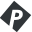

In [13]:
from pyinstrument import Profiler
from IPython.display import HTML

profiler = Profiler()
profiler.start()

for i in range(1000):
    gini([1 for i in range(1000)])
    gini_faster([1 for i in range(1000)])

profiler.stop()

HTML(profiler.output_html())

C'est plus facile à lire.

### Exercice 5 : la fonction _gini_cumsum contient deux boucles. Quelle est la plus rapide ?

Pour ce faire, on découpe la fonction en deux.

In [14]:
def _gini_cumsum2a(couples):
    for i in range(1, len(couples)):
        couples[i][0] += couples[i-1][0]
        couples[i][1] += couples[i-1][1]
    return couples


def _gini_cumsum2b(couples):
    for i in range(0, len(couples)):
        couples[i][0] /= couples[-1][0]
        couples[i][1] /= couples[-1][1]
    return couples


def _gini_cumsum2(couples):
    _gini_cumsum2a(couples)
    _gini_cumsum2b(couples)
    return couples


def gini2(Y):
    Y = _gini_sort(Y)
    couples = _gini_init(Y)
    couples = _gini_cumsum2(couples)
    return _gini_final(couples)


gini2([1, 1, 1, 1, 1]), gini2([0, 0, 0, 0, 100000])

(0.5, 0.9)

In [15]:
import cProfile, pstats, io
from pstats import SortKey
pr = cProfile.Profile()
pr.enable()

for i in range(1000):
    gini2([1 for i in range(1000)])
    gini_faster([1 for i in range(1000)])

pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(filtre(s.getvalue()))

     1000    0.002    0.000    1.183    0.001 <ipython-input-15-2fd5204eb0f7>:21(gini2)
     1000    0.002    0.000    1.061    0.001 <ipython-input-6-a3c3cc48873e>:16(gini_faster)
     1000    0.672    0.001    0.673    0.001 <ipython-input-2-6d8b3d4c048c>:9(_gini_cumsum)
     1000    0.001    0.000    0.662    0.001 <ipython-input-15-2fd5204eb0f7>:15(_gini_cumsum2)
     1000    0.353    0.000    0.353    0.000 <ipython-input-2-6d8b3d4c048c>:19(_gini_final)
     1000    0.341    0.000    0.341    0.000 <ipython-input-15-2fd5204eb0f7>:1(_gini_cumsum2a)
     1000    0.320    0.000    0.320    0.000 <ipython-input-15-2fd5204eb0f7>:8(_gini_cumsum2b)
     2000    0.002    0.000    0.309    0.000 <ipython-input-2-6d8b3d4c048c>:5(_gini_init)
     1000    0.218    0.000    0.218    0.000 <ipython-input-6-a3c3cc48873e>:1(_gini_final_faster)
     2000    0.009    0.000    0.025    0.000 <ipython-input-2-6d8b3d4c048c>:1(_gini_sort)


Elles sont aussi rapides l'une que l'autre. On peut néanmoins en accélérer une puisqu'on divise tous les éléments d'un tableau par une même valeur. On peut la stocker dans une variable plutôt que d'aller la chercher à chaque fois dans le tableau.

In [16]:
def _gini_cumsum3b(couples):
    total0 = couples[-1][0]
    total1 = couples[-1][1]
    for i in range(0, len(couples)):
        couples[i][0] /= total0
        couples[i][1] /= total1
    return couples


def _gini_cumsum3(couples):
    _gini_cumsum2a(couples)
    _gini_cumsum3b(couples)
    return couples


def gini3(Y):
    Y = _gini_sort(Y)
    couples = _gini_init(Y)
    couples = _gini_cumsum3(couples)
    return _gini_final(couples)


gini2([1, 1, 1, 1, 1]), gini2([0, 0, 0, 0, 100000])

(0.5, 0.9)

In [17]:
import cProfile, pstats, io
from pstats import SortKey
pr = cProfile.Profile()
pr.enable()

for i in range(1000):
    gini2([1 for i in range(1000)])
    gini3([1 for i in range(1000)])

pr.disable()
s = io.StringIO()
sortby = SortKey.CUMULATIVE
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(filtre(s.getvalue()))

     1000    0.002    0.000    1.149    0.001 <ipython-input-15-2fd5204eb0f7>:21(gini2)
     1000    0.002    0.000    1.081    0.001 <ipython-input-17-492a2c865fd9>:16(gini3)
     2000    0.685    0.000    0.685    0.000 <ipython-input-2-6d8b3d4c048c>:19(_gini_final)
     2000    0.658    0.000    0.658    0.000 <ipython-input-15-2fd5204eb0f7>:1(_gini_cumsum2a)
     1000    0.001    0.000    0.640    0.001 <ipython-input-15-2fd5204eb0f7>:15(_gini_cumsum2)
     1000    0.001    0.000    0.573    0.001 <ipython-input-17-492a2c865fd9>:10(_gini_cumsum3)
     1000    0.311    0.000    0.311    0.000 <ipython-input-15-2fd5204eb0f7>:8(_gini_cumsum2b)
     2000    0.002    0.000    0.303    0.000 <ipython-input-2-6d8b3d4c048c>:5(_gini_init)
     1000    0.242    0.000    0.242    0.000 <ipython-input-17-492a2c865fd9>:1(_gini_cumsum3b)
     2000    0.009    0.000    0.025    0.000 <ipython-input-2-6d8b3d4c048c>:1(_gini_sort)


C'est mieux même si l'amélioration ne paraît pas nécessairement significative par rapport au temps total, le résultat l'est si on regarde le temps fonction par fonction.